c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006\ch06
c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006


train loss:2.3009951707054044
=== epoch:1, train acc:0.169, test acc:0.2 ===
train loss:2.2991100233415636
train loss:2.295114630251247
train loss:2.2923013847589835
train loss:2.28181496442957
train loss:2.272549814280407
train loss:2.257373319786762
train loss:2.2367935640085936
train loss:2.208127032241117
train loss:2.2061761379457443
train loss:2.1862217920151155
train loss:2.123761093133693
train loss:2.095038751080735
train loss:2.0463288388391745
train loss:1.9889324170022946
train loss:1.939065297274247
train loss:1.919276567937763
train loss:1.7417117494476713
train loss:1.7066466131143663
train loss:1.600913327461842
train loss:1.5314033466986587
train loss:1.397171857941583
train loss:1.341068254226274
train loss:1.1898572689615852
train loss:1.2978406983873754
train loss:1.1554281132376745
train loss:1.1079776919299897
train loss:0.9890347918157826
train loss:0.9543674972073275
train loss:0.8604363117768723
train loss:0.7361629700733404
train loss:0.7640685068597619
train 

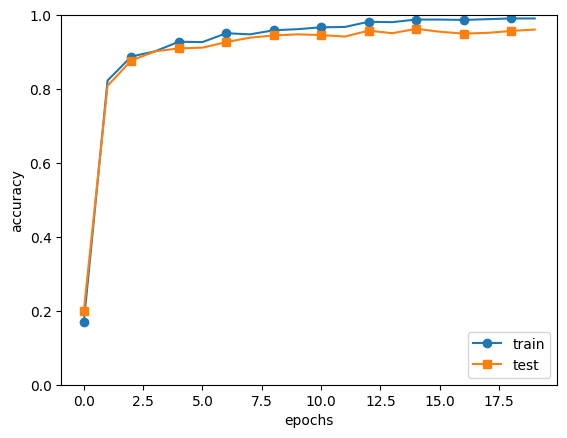

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test [:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

trainer.train()

# 매개변수 보존
network. save_params ("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer. train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer. test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()